In [1]:
import pandas as pd

### Load Training data

In [2]:
fruits = pd.read_csv("Fruits.csv")

In [3]:
fruits.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### Manual Classification Plot

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

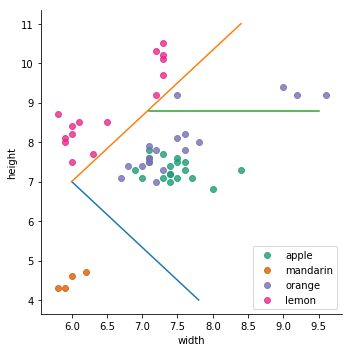

In [5]:
import seaborn as sns
sns.lmplot(x = "width", y = "height",data = fruits, fit_reg=False, hue='fruit_name', legend=False, palette="Dark2")
plt.plot([6,7.8],[7,4])
plt.plot([6,8.4],[7,11])
plt.plot([7.1,9.5],[8.8,8.8])
plt.legend(loc='lower right')
plt.show()


### Decision Tree Classification

In [6]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [7]:
fruits.array = fruits.as_matrix()
fruits.data = fruits.array[:,3:]
fruits.target = fruits.array[:,0]
fruits.target = fruits.target.astype('int32')
fruits.feature_names = ['mass','width','height','color_score']
fruits.target_names = ['apple','mandarin','orange','lemon']

### Take two features - Width and Height

In [8]:
X = fruits.data[:, 1:3]
y = fruits.target

### Train Decision Tree with the training data

In [9]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7, min_samples_split=4,).fit(X, y)

### Plot Decision Tree displaying the splits

In [10]:
# Plot Parameters
n_classes = 5
plot_colors = ['Red','Green','Blue','Yellow']
plot_step = 0.02

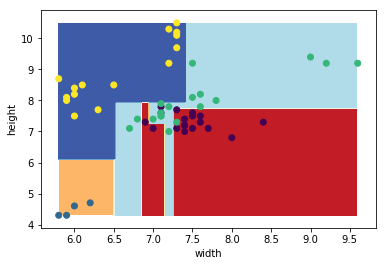

In [11]:
#Contour
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(fruits.feature_names[1])
plt.ylabel(fruits.feature_names[2])

#Scatter plot
plt.scatter(x = fruits['width'], y = fruits['height'], c = fruits['fruit_label'])
plt.axis("tight")
plt.show()

### Build Tree

In [12]:
import graphviz
from sklearn import tree

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names = fruits.feature_names[1:3], class_names = fruits.target_names) 

In [14]:
graph = graphviz.Source(dot_data) 

In [15]:
graph.render("fruits",view=True ) 

'fruits.pdf'

### Training accuracy

In [16]:
clf.score(X,y)

0.94545454545454544

### Test Data

In [17]:
test = pd.read_csv("Test.csv")

In [18]:
test.array = test.as_matrix()
test.data = test.array[:,3:]
test.target = test.array[:,0]
test.target = test.target.astype('int32')
test.feature_names = ['mass','width','height','color_score']
test.target_names = ['apple','mandarin','orange','lemon']

In [19]:
x_test = test.data[:, 1:3]
clf.predict(x_test)

array([2, 3, 3, 4])

In [20]:
test.target

array([2, 1, 3, 4])

### Test Accuracy

In [21]:
clf.score(x_test,test.target)

0.75